####### How fraud cases are different from non-fraud cases?
####### Can we identify any feature which can explain/distinguish between two target classes?

In [1]:
### import files and packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def read_data(path):
    '''This function imports comma seperated values file.
    Input: path - file location
    Output: dataframe object'''
    return pd.read_csv(path)

In [3]:
## Read dataframe object 
df = read_data('fraud dataset.csv')

In [4]:
print(df.shape)

(9999, 51)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 51 columns):
TransactionID     9999 non-null int64
isFraud           9999 non-null int64
TransactionDT     9999 non-null int64
TransactionAmt    9999 non-null float64
ProductCD         9999 non-null object
card1             9999 non-null int64
card2             9880 non-null float64
card3             9998 non-null float64
card4             9998 non-null object
card5             9977 non-null float64
card6             9998 non-null object
addr2             9086 non-null float64
dist1             3385 non-null float64
dist2             378 non-null float64
P_emaildomain     7894 non-null object
R_emaildomain     1625 non-null object
C1                9999 non-null int64
C2                9999 non-null int64
C3                9999 non-null int64
C4                9999 non-null int64
C5                9999 non-null int64
C6                9999 non-null int64
C7                9999 non-null int64
C

In [6]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df.isFraud==0]['card1'].nunique()

2034

In [8]:
df[df.isFraud==0]['card2'].nunique()

418

In [9]:
df[df.isFraud==0]['card3'].nunique()

24

##### list of challeneges to this dataset?
    - few numerical features
    - lot of missing values
    - imbalanced dataset (1~3% ; 0~97%)
    - column description missing

## segregating numerical and categorical columns

In [10]:
categorical_features = df.select_dtypes(include = np.object).columns
numerical_features   = df.drop(['isFraud','TransactionID'],axis = 1).select_dtypes(include = np.number).columns

print(categorical_features)
print(numerical_features)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6'], dtype='object')
Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15'], dtype='object')


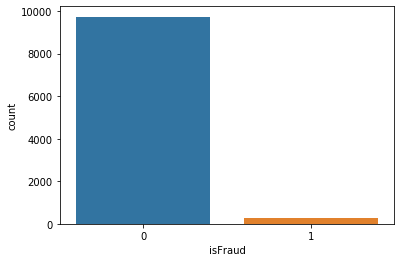

In [11]:
### target analysis - target variable is 'isFraud'
sns.countplot(df['isFraud'])

In [12]:
print("{}% of the data is having target class 1".format(round(len(df[df.isFraud==1])/len(df)*100),4))
print("{}% of the data is having target class 0".format(round(len(df[df.isFraud==0])/len(df)*100),4))

3% of the data is having target class 1
97% of the data is having target class 0


### Missing values handling
    Guidelines
      - drop columns having missing values percentage >= 70 %
      - for columns < 70% missing values fill with one of the following approaches
          - median
          - mean if normally distributed
          - random values generated between 2 Standard deviation
          - or predict the missing values using a model

In [13]:
# cnt_missing = df[numerical_features].isnull().sum()
# per_missing = round(df[numerical_features].isnull().sum()/df.shape[0]*100,2)

# _d= pd.concat([pd.DataFrame(cnt_missing,columns = ['cntMissingValues']),
#               pd.DataFrame(per_missing,columns=['perMissingValues'])], axis = 1)

In [14]:
per = round(df.isnull().sum()/df.shape[0]*100,2)
per.sort_values(ascending = False)

D7                97.77
D13               97.20
dist2             96.22
D12               95.94
D14               95.50
D6                95.09
D8                89.00
D9                89.00
R_emaildomain     83.75
D11               77.24
D5                72.32
dist1             66.15
D4                62.31
M5                57.94
M1                57.91
M2                57.91
M3                57.91
D15               49.30
M4                48.86
D2                45.76
D3                42.72
M6                25.72
P_emaildomain     21.05
D10               12.65
addr2              9.13
card2              1.19
card5              0.22
card3              0.01
card4              0.01
card6              0.01
TransactionAmt     0.00
ProductCD          0.00
card1              0.00
TransactionDT      0.00
isFraud            0.00
C10                0.00
C1                 0.00
C2                 0.00
C3                 0.00
C4                 0.00
C5                 0.00
C6              

In [15]:
(per>69).sort_values(ascending = False).index

Index(['D6', 'D13', 'D5', 'D7', 'D8', 'D9', 'dist2', 'D11', 'D12', 'D14', 'R_emaildomain', 'card5', 'P_emaildomain', 'C1', 'C2', 'dist1', 'C3', 'addr2', 'card6', 'M6', 'card4', 'card3', 'C5', 'card2', 'card1', 'ProductCD', 'TransactionAmt', 'TransactionDT', 'isFraud', 'C4', 'C10', 'C6', 'C7', 'M4', 'M3', 'M2', 'M1', 'D15', 'D10', 'D4', 'D3', 'D2', 'D1', 'C14', 'C13', 'C12', 'C11', 'M5', 'C9', 'C8', 'TransactionID'], dtype='object')

### columns which can be dropped:
    ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5','R_emaildomain','P_emaildomain']

In [16]:
drop_columns = ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5','R_emaildomain','P_emaildomain']
dfnew = df.drop(drop_columns, axis = 1, inplace = False)

In [17]:
dfnew.shape

(9999, 39)

In [18]:
categorical_features = dfnew.select_dtypes(include = np.object).columns
numerical_features   = dfnew.drop(['isFraud','TransactionID'],axis = 1).select_dtypes(include = np.number).columns

print(categorical_features)
print(numerical_features)

Index(['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6'], dtype='object')
Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr2', 'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D15'], dtype='object')


In [19]:
dfnew.M1.unique() # NO VARIATION hence dropping

array(['T', nan], dtype=object)

In [20]:
dfnew.drop('M1',axis=1,inplace=True)

In [21]:
pernew = round(dfnew.isnull().sum()/dfnew.shape[0]*100,2)
pernew.sort_values(ascending = False)

dist1             66.15
D4                62.31
M5                57.94
M3                57.91
M2                57.91
D15               49.30
M4                48.86
D2                45.76
D3                42.72
M6                25.72
D10               12.65
addr2              9.13
card2              1.19
card5              0.22
card3              0.01
card4              0.01
card6              0.01
isFraud            0.00
C1                 0.00
TransactionAmt     0.00
ProductCD          0.00
card1              0.00
TransactionDT      0.00
C6                 0.00
C2                 0.00
C3                 0.00
C4                 0.00
C5                 0.00
C7                 0.00
C8                 0.00
C9                 0.00
C10                0.00
C11                0.00
C12                0.00
C13                0.00
C14                0.00
D1                 0.00
TransactionID      0.00
dtype: float64

#### quick questions:
- should we include card details as features?

In [22]:
dfnew.head(1)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,13.0,0.0,T,T,M2,F,T


###
1. card1,card2, card3, card4,card5,card6 -> get propertion of fraud cases
2. merge(card1,card2, card3, card4,card5)-> get propertion of fraud cases
3. merge(addr2	dist1	dist2) --> get propertion of fraud cases
4. P_emaildomain, R_emaildomain -> get propertion of fraud cases
5. Is there distinct TransactionAmt range for fraud case and none-fraud case?

In [23]:
#1. 
_ = pd.merge(df.groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows'}),df[df.isFraud==1].groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_1'}),on = ['card1'],how = 'inner')

pd.merge(_,df[df.isFraud==0].groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_0'}),on = ['card1'],how = 'left')

,total_rows,total_rows_1,total_rows_0
card1,,,
1085,8,3,5.0
1129,2,1,1.0
1191,2,2,NaN
1284,6,1,5.0
1342,20,3,17.0
1444,34,1,33.0
1595,1,1,NaN
1724,16,2,14.0
1764,14,1,13.0


In [24]:
df.card6.isnull().sum() ## this missing values can be dropped

1

In [25]:
#1. 
_ = pd.merge(df.groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows'}),df[df.isFraud==1].groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_1'}),on = ['card6'],how = 'inner')

pd.merge(_,df[df.isFraud==0].groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_0'}),
        on = ['card6'],how = 'left')

,total_rows,total_rows_1,total_rows_0
card6,,,
credit,2108,150,1958
debit,7890,115,7775


### quick note:
 - credit card transactions having relatively higher fraud cases
    
    #######150/2108
    
    ########115/7890

In [26]:
dfnew.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,13.0,0.0,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,0.0,315.0,T,T,M0,F,F


In [27]:
### fill
dfnew[['card1','card2','card3','card4','card5','card6']] = dfnew[['card1','card2','card3','card4','card5','card6']].fillna(method='bfill')

In [28]:
dfnew.card1 = dfnew.card1.astype('int')
dfnew.card2 = dfnew.card2.astype('int')
dfnew.card3 = dfnew.card3.astype('int')
dfnew.card5 = dfnew.card5.astype('int')
# dfnew['card_'] = dfnew.card1.astype('str')+dfnew.card2.astype('str')+dfnew.card3.astype('str')+dfnew.card4.astype('str')+dfnew.card5.astype('str')+dfnew.card6.astype('str')
# dfnew.loc[:,['card1','card2','card3','card4','card5','card6','card_']]

In [29]:
dfnew.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,404,150,discover,142,credit,87.0,19.0,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,13.0,0.0,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404,150,mastercard,102,credit,87.0,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490,150,visa,166,debit,87.0,287.0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,0.0,315.0,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567,150,mastercard,117,debit,87.0,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,84.0,111.0,NaN,NaN,M0,T,F
4,2987004,0,86506,50.0,H,4497,514,150,mastercard,102,credit,87.0,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# card1 -> headquarter
# card2 -> dept
# card3 -> brand(saving/)

#### TransactionAmt, TransactionDT Evaluation

Text(0.5, 1.0, 'Date vs. Amount')

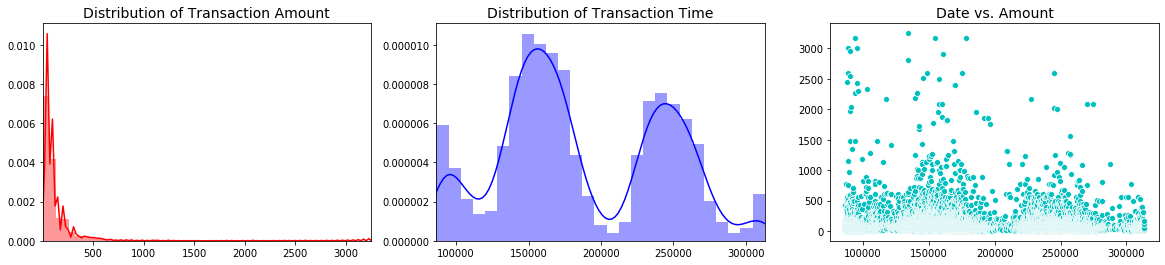

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))

amount_val = dfnew['TransactionAmt'].values
date_val = dfnew['TransactionDT'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(date_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(date_val), max(date_val)])

sns.scatterplot(date_val, amount_val, ax=ax[2], color='c')
ax[2].set_title('Date vs. Amount', fontsize=14)
# ax[2].set_xlim([min(date_val), max(date_val)])

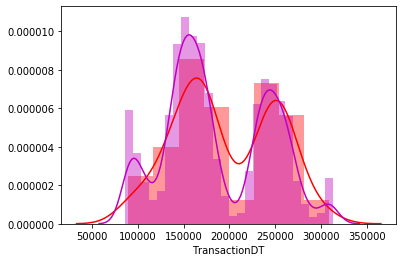

In [32]:
sns.distplot(dfnew[dfnew.isFraud==1]['TransactionDT'],color='r')
# plt.show()
sns.distplot(dfnew[dfnew.isFraud==0]['TransactionDT'],color='m')

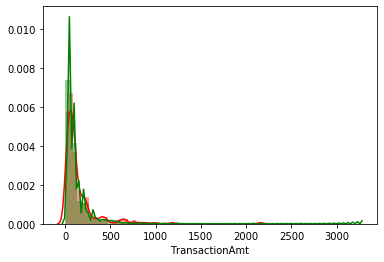

In [33]:
sns.distplot(dfnew[dfnew.isFraud==1]['TransactionAmt'],color='r')
# plt.show()
sns.distplot(dfnew[dfnew.isFraud==0]['TransactionAmt'],color='g')
# No major difference between Fraud and Non Fraud cases on the basis of Transaction amount

In [34]:
# 1. does all the large amount transactions corresponds to fraud case?
# 2. fraud transaction timing?

Text(0.5, 1.0, 'Distribution of ProductCD wrt. Target')

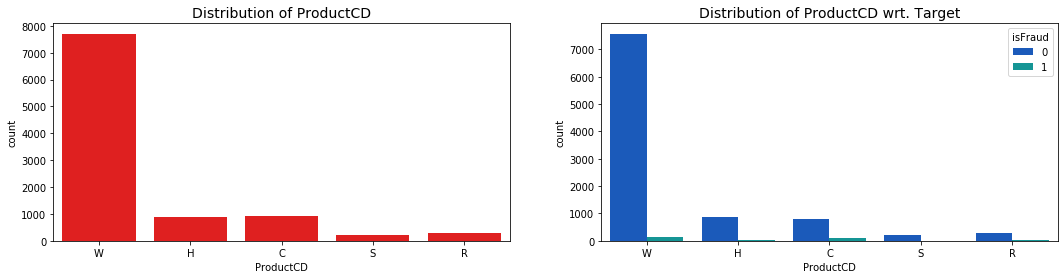

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.countplot('ProductCD', data = dfnew, ax=ax[0], color='r')
ax[0].set_title('Distribution of ProductCD', fontsize=14)

sns.countplot('ProductCD', ax=ax[1], data = dfnew, color='b',hue='isFraud',palette = 'winter')
ax[1].set_title('Distribution of ProductCD wrt. Target', fontsize=14)

In [36]:
# ProductCD 'C' has thelargest ratio of fraud cases in comparison to total products in ProductCD

In [37]:
dfnew.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr2', 'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D15', 'M2', 'M3', 'M4', 'M5', 'M6'], dtype='object')

In [38]:
### distinct values from M2 to M6.
# M2 ['T' 'nan' 'F']
# M3 ['T' 'nan' 'F']
# M4 ['M2' 'M0' 'nan' 'M1']
# M5 ['F' 'T' 'nan']
# M6 ['T' 'F' 'nan']

### data issue: M4 has a level 'M0' for which corresponding column does not exist
### filling above columns depends on their corresponding 0 and 1 proportion.

In [39]:
# M4->659 M2 
# M2-> 3290 (T) 319->(F)

In [40]:
print(df[(df.M4=='M2') & (df.M2=='T')]['isFraud'].value_counts())
print(df[(df.M4=='M2') & (df.M2=='F')]['isFraud'].value_counts())

0    30
1     1
Name: isFraud, dtype: int64
0    6
1    1
Name: isFraud, dtype: int64


Text(0.5, 1.0, 'Distribution of M4')

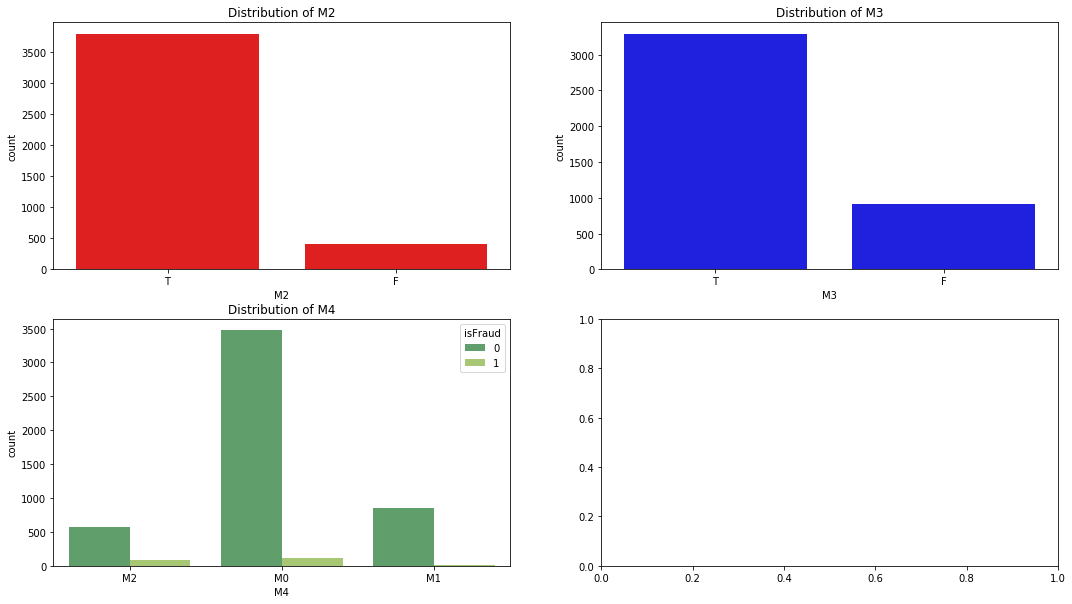

In [41]:
fig, ax = plt.subplots(2,2, figsize=(18,10))

sns.countplot('M2', data = dfnew, ax=ax[0,0], color='r')
ax[0,0].set_title('Distribution of M2', fontsize=12)

sns.countplot('M3', data = dfnew, ax=ax[0,1], color='b')
ax[0,1].set_title('Distribution of M3', fontsize=12)

sns.countplot('M4', ax=ax[1,0], data = dfnew, color='y',hue='isFraud', palette= 'summer')
ax[1,0].set_title('Distribution of M4', fontsize=12)

In [42]:
dfnew.addr2.value_counts()

87.0    9079
96.0       7
Name: addr2, dtype: int64

Text(0.5, 1.0, 'Distribution of address')

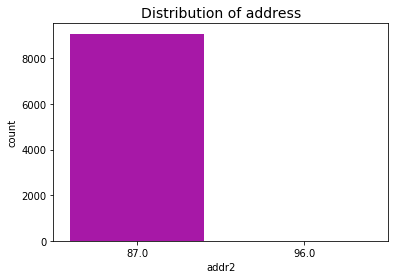

In [43]:
s = sns.countplot('addr2', data = df, color='m')
s.set_title('Distribution of address', fontsize=14)

In [44]:
df.addr2.isnull().sum()

913

In [45]:
dfnew.drop('addr2',axis=1,inplace= True) #addr2 has no variation among it hence dropping

In [46]:
f =['dist1','D1','D2','D3','D4','D10','D15','M2','M3','M4','M5','M6']

#### Filling Remaining Empty Spaces using Fillna 

In [47]:
dfnew[['dist1','D1','D2','D3','D4','D10','D15','M2','M3','M4','M5','M6']] = dfnew[['dist1','D1','D2','D3','D4','D10','D15','M2','M3','M4','M5','M6']].fillna(method = 'bfill')

In [48]:
dfnew[['dist1','D1','D2','D3','D4','D10','D15','M2','M3','M4','M5','M6']] = dfnew[['dist1','D1','D2','D3','D4','D10','D15','M2','M3','M4','M5','M6']].fillna(method = 'ffill')

In [49]:
dfnew.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
dist1             0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D10               0
D15               0
M2                0
M3                0
M4                0
M5                0
M6                0
dtype: int64

### Correlation Check

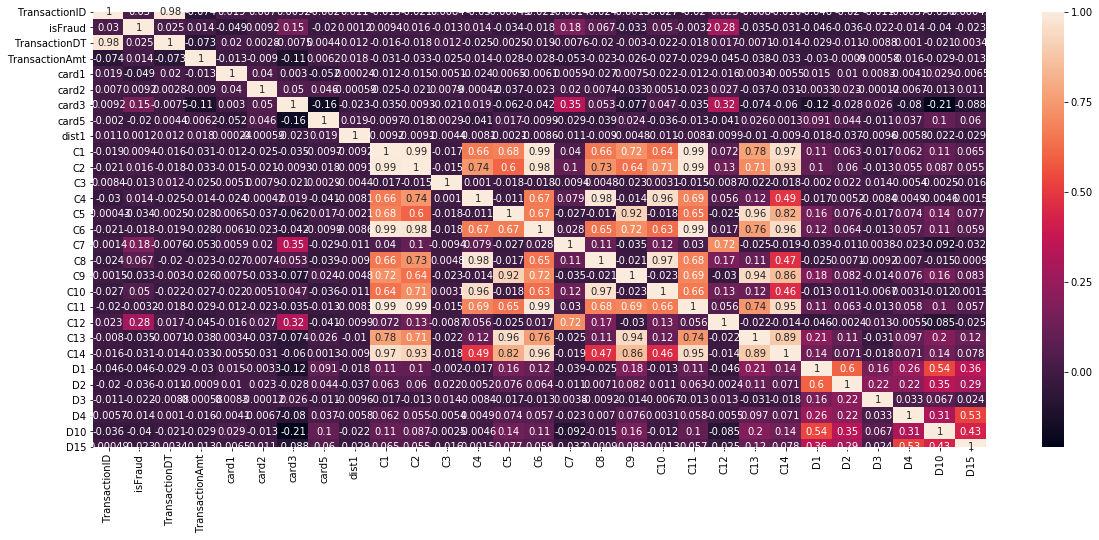

In [50]:
co = dfnew.corr()
plt.figure(figsize=(20,8)) #C1, C11 ,C6 are highly corelated and can't be used  
sns.heatmap(co,annot = True)

In [51]:
drop_columns = ['C1','C6','C11']
dfnew.drop(drop_columns, axis = 1, inplace= True)

In [52]:
dfnew.shape

(9999, 34)

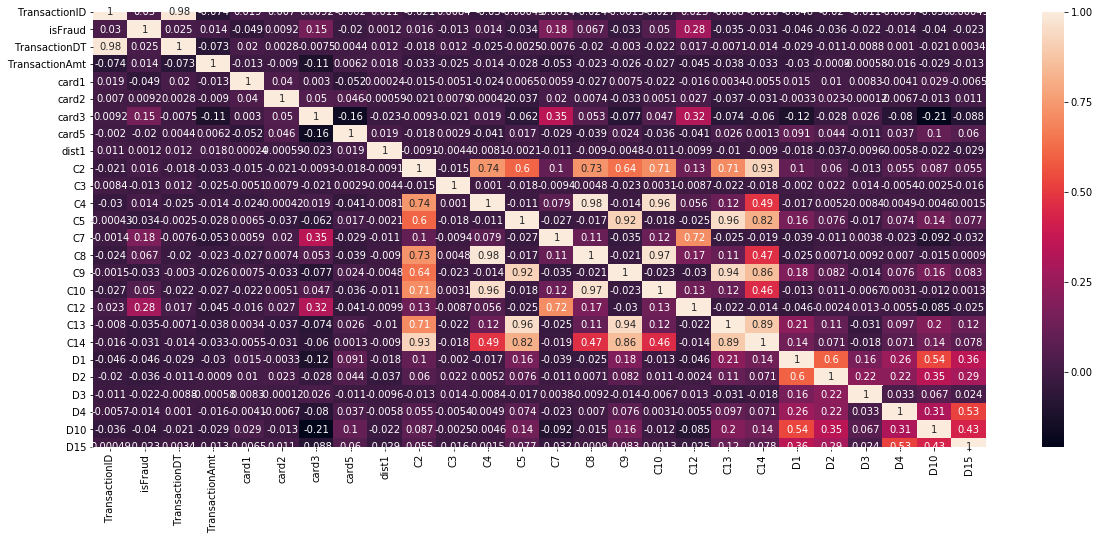

In [53]:
co = dfnew.corr()
plt.figure(figsize=(20,8))  
sns.heatmap(co,annot = True)

In [54]:
# Reducing the Skewness in Transaction amount

Text(0.5, 1.0, 'Distribution of Log(Power(TransactionAmt))')

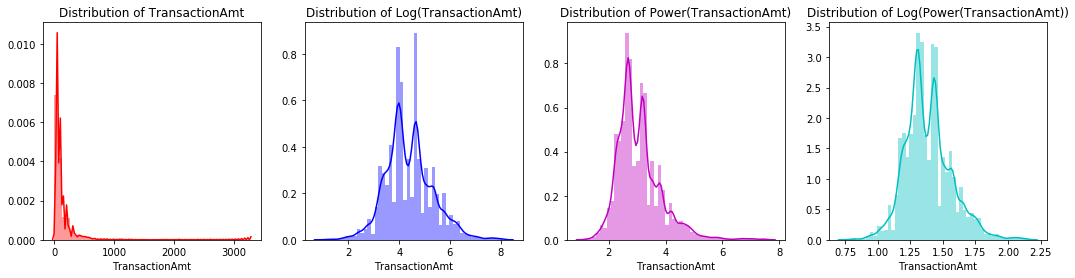

In [55]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

sns.distplot(dfnew['TransactionAmt'], ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionAmt', fontsize=12)

sns.distplot(np.log1p(dfnew['TransactionAmt']), ax=ax[1], color='b')
ax[1].set_title('Distribution of Log(TransactionAmt)', fontsize=12)

sns.distplot(np.power(dfnew['TransactionAmt'],0.25),ax=ax[2],color='m')
ax[2].set_title('Distribution of Power(TransactionAmt)', fontsize=12)

sns.distplot(np.log1p(np.power(dfnew['TransactionAmt'],0.25)),ax=ax[3],color='c')
ax[3].set_title('Distribution of Log(Power(TransactionAmt))', fontsize=12)

## log transformation alone is not working
## to reduce bimodal of the data, binning might work
## similary other variables/features need detail analysis and handling

In [56]:
# Here we can see Distribution of Log(Power(TransactionAmt)) is most nicely Distributed

In [57]:
dfnew.TransactionAmt = np.log1p(np.power(dfnew['TransactionAmt'],0.25))

In [58]:
dfnew.head(1)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,dist1,C2,C3,C4,C5,C7,C8,C9,C10,C12,C13,C14,D1,D2,D3,D4,D10,D15,M2,M3,M4,M5,M6
0,2987000,0,86400,1.355032,W,13926,404,150,discover,142,credit,19.0,1,0,0,0,0,0,1,0,0,1,1,14,112.0,13.0,0.0,13.0,0.0,T,T,M2,F,T


In [59]:
dfnew = pd.get_dummies(dfnew)
print(dfnew.shape)

(9999, 48)


In [60]:
dfnew.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,dist1,C2,C3,C4,C5,C7,C8,C9,C10,C12,C13,C14,D1,D2,D3,D4,D10,D15,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T
0,2987000,0,86400,1.355032,13926,404,150,142,19.0,1,0,0,0,0,0,1,0,0,1,1,14,112.0,13.0,0.0,13.0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1
1,2987001,0,86401,1.200144,2755,404,150,102,287.0,1,0,0,0,0,0,0,0,0,1,1,0,112.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
2,2987002,0,86469,1.327470,4663,490,150,166,287.0,1,0,0,0,0,0,1,0,0,1,1,0,112.0,0.0,0.0,0.0,315.0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0
3,2987003,0,86499,1.297230,18132,567,150,117,36.0,5,0,0,0,0,0,1,0,0,25,1,112,112.0,0.0,94.0,84.0,111.0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0
4,2987004,0,86506,1.297230,4497,514,150,102,36.0,1,0,0,0,0,1,0,1,0,1,1,0,61.0,30.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1


In [61]:
dfnew.isFraud.isnull().sum()

0

# MODEL BUILDING

In [62]:
# pip install imblearn

In [63]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble       import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score,recall_score,accuracy_score, roc_auc_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Train Test split

In [64]:
### normalising and spliting in to train and test sets
X = dfnew.drop(['TransactionID','isFraud'], axis = 1)
y = dfnew.isFraud

ss = StandardScaler().fit(X,y)
X_ = ss.transform(X)

X_train, X_test, y_train, y_test = tts(X_,y,test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7999, 46)
(2000, 46)
(7999,)
(2000,)


# model1: base model with RandomOverSampler()

Validation set: confusion matrix with random-over-sampling


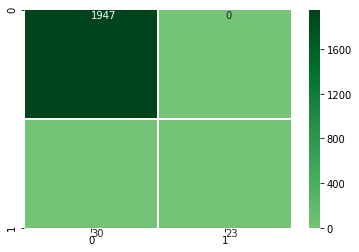

In [65]:
steps = [('over', RandomOverSampler()), ('model', RandomForestClassifier())] ### steps

pipeline = Pipeline(steps=steps) ### object

pipeline.fit(X_train, y_train) ## training

y_hat = pipeline.predict(X_test) ## prediction
print('Validation set: confusion matrix with random-over-sampling')
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm, annot=True, center = True,fmt="d",linewidths=0.5,cmap="Greens",vmin=0,vmax = cm.max(),annot_kws=annot_kws)

In [66]:
print('Training AUC Score: {}'.format(round(roc_auc_score(y_train, pipeline.predict(X_train))*100,4)))
print('validation AUC Score: {}'.format(round(roc_auc_score(y_test, y_hat)*100,4)))

Training AUC Score: 100.0
validation AUC Score: 71.6981


# model2: base model with RandomUnderSampler()

Validation set: confusion matrix with Random-under-sampling


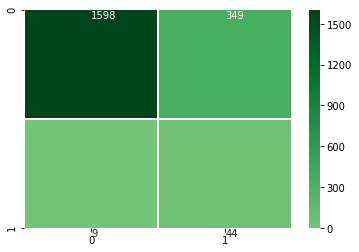

In [67]:
steps = [('under', RandomUnderSampler()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train) ## training

y_hat = pipeline.predict(X_test) ## prediction
print('Validation set: confusion matrix with Random-under-sampling')
# confusion_matrix(y_test, y_hat, labels=[0,1])
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm, annot=True, center = True,fmt="d",linewidths=0.5,cmap="Greens",vmin=0,vmax = cm.max(),annot_kws=annot_kws)

In [68]:

print('Training AUC Score: {}'.format(round(roc_auc_score(y_train, pipeline.predict(X_train))*100,4)))
print('validation AUC Score: {}'.format(round(roc_auc_score(y_test, y_hat)*100,4)))

Training AUC Score: 91.1455
validation AUC Score: 82.5469


# model3: base model with SMOTE

Validation set: confusion matrix with SMOTE-over-sampling


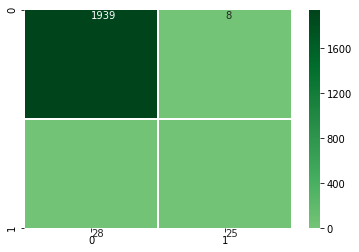

In [69]:
# SMOTE-synthetic minority oversampling technique

steps = [('over', SMOTE(random_state= 42)), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train) ## training

y_hat = pipeline.predict(X_test) ## prediction
print('Validation set: confusion matrix with SMOTE-over-sampling')
# confusion_matrix(y_test, y_hat, labels=[0,1])
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
sns.heatmap(cm, annot=True, center=True, fmt="d",linewidths=0.5,cmap="Greens",vmin=0, vmax=cm.max(),annot_kws=annot_kws)

In [70]:
print('Training AUC Score: {}'.format(round(roc_auc_score(y_train, pipeline.predict(X_train))*100,4)))
print('validation AUC Score: {}'.format(round(roc_auc_score(y_test, y_hat)*100,4)))

Training AUC Score: 100.0
validation AUC Score: 73.3795


### Checking for different k

In [71]:
for k in range(4,10,1):
    steps = [('over', SMOTE(random_state=42, k_neighbors=k)), ('model', RandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train) ## training
    y_hat = pipeline.predict(X_test) ## prediction
    print('validation set:AUC Score: {}%'.format(round(roc_auc_score(y_test, y_hat)*100,4)))
    print('Validation set: confusion matrix with SMOTE-over-sampling with k = {}'.format(k))
    print(confusion_matrix(y_test, y_hat, labels=[0,1]))


validation set:AUC Score: 73.4051%
Validation set: confusion matrix with SMOTE-over-sampling with k = 4
[[1940    7]
 [  28   25]]
validation set:AUC Score: 74.3485%
Validation set: confusion matrix with SMOTE-over-sampling with k = 5
[[1940    7]
 [  27   26]]
validation set:AUC Score: 72.4874%
Validation set: confusion matrix with SMOTE-over-sampling with k = 6
[[1941    6]
 [  29   24]]
validation set:AUC Score: 73.3795%
Validation set: confusion matrix with SMOTE-over-sampling with k = 7
[[1939    8]
 [  28   25]]
validation set:AUC Score: 72.4874%
Validation set: confusion matrix with SMOTE-over-sampling with k = 8
[[1941    6]
 [  29   24]]
validation set:AUC Score: 74.3229%
Validation set: confusion matrix with SMOTE-over-sampling with k = 9
[[1939    8]
 [  27   26]]


###  searching best k value 
 - combining over-sampling and under-sampling
 - tunning k value in K_neighbours

In [72]:
# values to evaluate
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = RandomForestClassifier()
	over  = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.881
> k=2, Mean ROC AUC: 0.883
> k=3, Mean ROC AUC: 0.884
> k=4, Mean ROC AUC: 0.887
> k=5, Mean ROC AUC: 0.883
> k=6, Mean ROC AUC: 0.887
> k=7, Mean ROC AUC: 0.883


# Random Forest Classifier usin GridSearch

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [74]:
#### Randomforest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print(accuracy_score(y_train, model_rf.predict(X_train)))
print(accuracy_score(y_test, model_rf.predict(X_test)))

0.9998749843730467
0.982


In [75]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
#### Randomforestclassifier

param = {'max_depth':[1,2,3,4],
        'max_features':['auto','sqrt'] }

In [77]:
gs_r = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [78]:
gs_r = gs_r.fit(X_train, y_train)
print(accuracy_score(y_train, gs_r.predict(X_train)))
print(accuracy_score(y_test, gs_r.predict(X_test)))

0.977997249656207
0.9765


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
# Decision tree with depth = 16
DT = DecisionTreeClassifier(random_state=1, max_depth=16)
DT.fit(X_train, y_train)
DT_score_train = DT.score(X_train, y_train)
print("Training score: ",DT_score_train)
DT_score_test = DT.score(X_test, y_test)
print("Testing score: ",DT_score_test)

Training score:  0.9967495936992125
Testing score:  0.974


# Logistic Regression Model

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
LR = LogisticRegression()

In [83]:
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
param = {'C':[0.1,1,10],
        'penalty':['l1','l2'] }

In [85]:
gs = GridSearchCV(estimator=LR, param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [86]:
## fit
gs = gs.fit(X_train, y_train)

gs.best_score_

gs.best_params_

## accuracy on validation dataset
accuracy_score(y_test, gs.predict(X_test))

0.978

In [87]:
from sklearn.svm import SVC
from sklearn import metrics

Validation set: confusion matrix with random-over-sampling


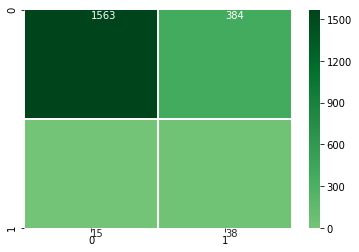

In [88]:
steps = [('over', RandomOverSampler()), ('model', LogisticRegression())] ### steps

pipeline = Pipeline(steps=steps) ### object

pipeline.fit(X_train, y_train) ## training

y_hat = pipeline.predict(X_test) ## prediction
print('Validation set: confusion matrix with random-over-sampling')
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm, annot=True, center = True,fmt="d",linewidths=0.5,cmap="Greens",vmin=0,vmax = cm.max(),annot_kws=annot_kws)

In [89]:
print('Training AUC Score: {}'.format(round(roc_auc_score(y_train, pipeline.predict(X_train))*100,4)))
print('validation AUC Score: {}'.format(round(roc_auc_score(y_test, y_hat)*100,4)))

Training AUC Score: 74.377
validation AUC Score: 75.9877


In [90]:
# values to evaluate
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = RandomForestClassifier()
	over  = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '['RandomForestClassifier()', 'SVM()', 'DecisionTreeClassifier()']' (type <class 'list'>) doesn't

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)